In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors


def getNumbers(df, zProj):

    x = df['x'].to_numpy()
    y = df['y'].to_numpy()
    z = df['z'].to_numpy()
    vx = df['vx'].to_numpy()
    vy = df['vy'].to_numpy()
    vz = df['vz'].to_numpy()

    phi = 180.0/3.14159 * np.arctan2(-vy, -vx)

    r = np.sqrt(vx**2+vy**2+vz**2)
    theta = 180.0/3.14159 * np.arccos(-vz/r)
    l = (zProj - z)/vz
    x = x + l * vx
    y = y + l * vy
    return phi, theta, x, y
    



In [19]:
fopen = pd.read_hdf('../datos/outputOpensky.h5')  
fpyram = pd.read_hdf('../datos/outputPyramid.h5')  

phiP, thetaP, xP, yP = getNumbers(fpyram, 1000.0)
phiO, thetaO, xO, yO = getNumbers(fopen, 1000.0)


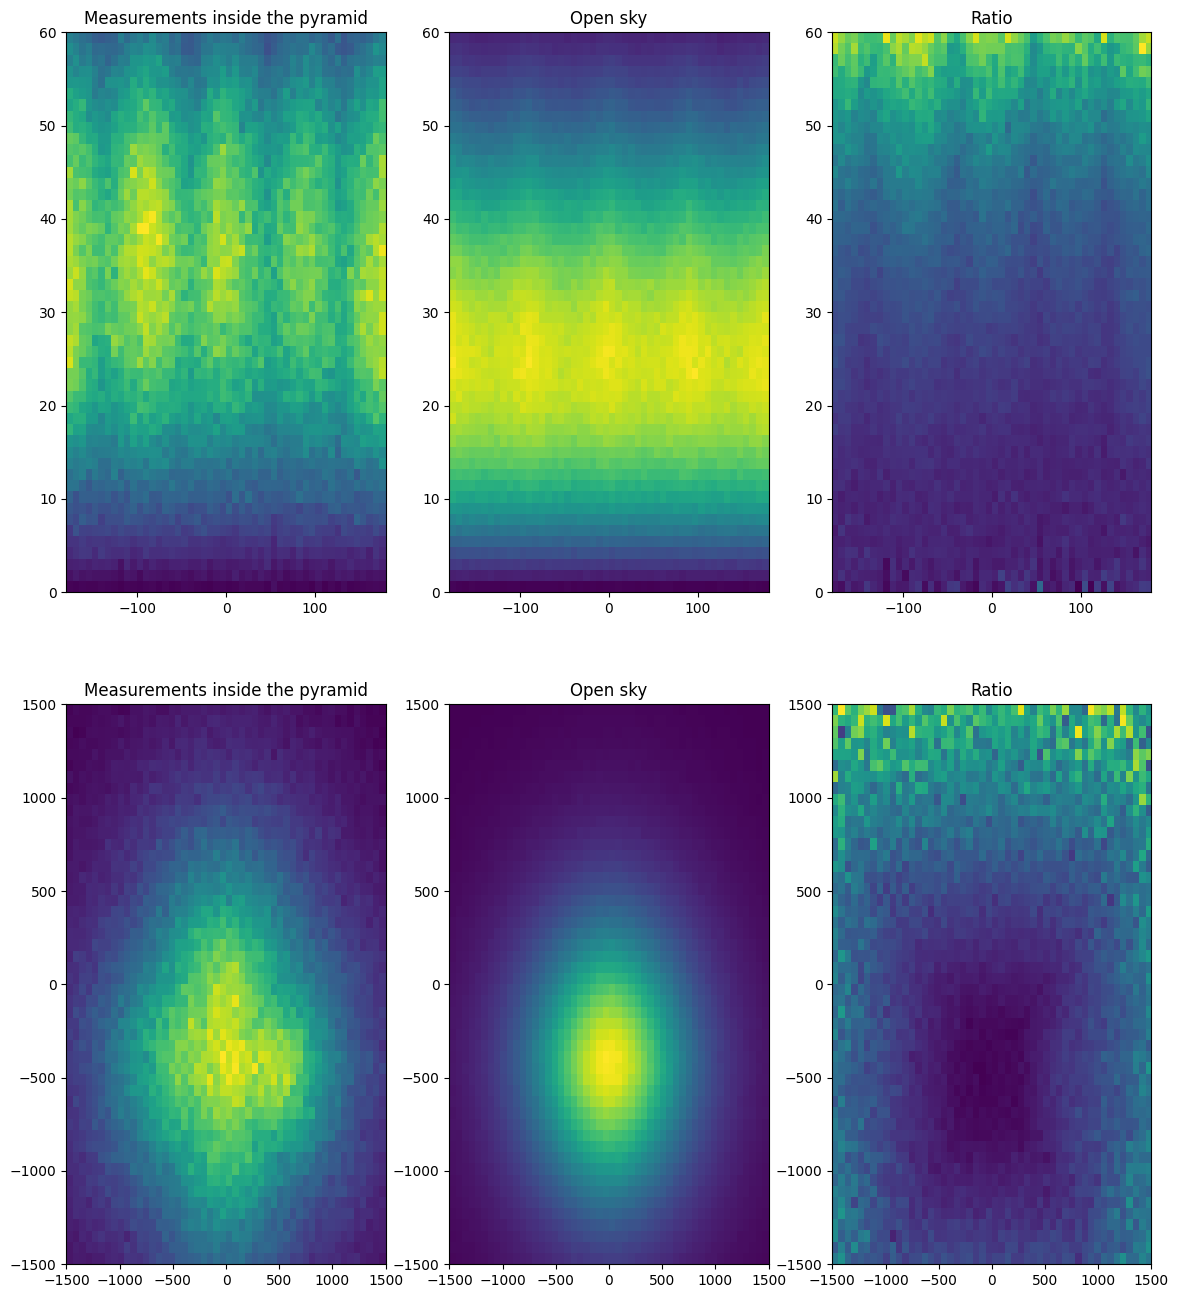

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 16))

axs[0,0].set_title('Measurements inside the pyramid')
axs[0,0].hist2d(phiP, thetaP, bins=50, range=[[-180.0, 180.0], [0.0, 60]])
axs[0,1].set_title('Open sky')
axs[0,1].hist2d(phiO, thetaO, bins=50, range=[[-180.0, 180.0], [0.0, 60]])

hP, xedges, yedges = np.histogram2d(phiP, thetaP, bins=50, range=[[-180.0, 180.0], [0.0, 60.0]])
hO, xedges, yedges = np.histogram2d(phiO, thetaO, bins=50, range=[[-180.0, 180.0], [0.0, 60.0]])
ratio = hP / hO
axs[0,2].set_title('Ratio')
pc = axs[0,2].pcolorfast(xedges, yedges, ratio.T)
rx = 1500
ry = 1500
axs[1,0].set_title('Measurements inside the pyramid')
axs[1,0].hist2d(xP, yP, bins=50, range=[[-rx, rx], [-ry, ry]])
axs[1,1].set_title('Open sky')
axs[1,1].hist2d(xO, yO, bins=50, range=[[-rx, rx], [-ry, ry]])

hP, xedges, yedges = np.histogram2d(xP, yP, bins=50, range=[[-rx, rx], [-ry, ry]])
hO, xedges, yedges = np.histogram2d(xO, yO, bins=50, range=[[-rx, rx], [-ry, ry]])
ratio = hP / hO
axs[1,2].set_title('Ratio')
#extent = [xedges[0], xedges[-1], yedges[-1], yedges[0]]
#axs[1,2].imshow(ratio, extent=extent, interpolation='nearest')
#pc = axs[1,2].hist2d(xedges, yedges, ratio.T)
pc = axs[1,2].pcolorfast(xedges, yedges, ratio.T)

plt.show()
#plt.savefig('figure.png')
